# COSMOS "Super-deblended" Photometry Catalog

### Ks band from Laigle et al., 2016
### IRAC 3.6$\mu$m, 4.5$\mu$m, 5.8$\mu$m, and 8.0$\mu$m
### Super-deblended: Spitzer MIPS/24$\mu$m, Herschel/PACS 100$\mu$m, Herschel/PACS 160$\mu$m
###                                 Herschel/SPIRE 250$\mu$m, Herschel/SPIRE 350$\mu$m, Herschel/SPIRE 500$\mu$m

https://drive.google.com/drive/folders/18iknbRBUJSqU3Tc5Fh6DRVJFrnLcWcl4

Title: ''Super-deblended'' Dust Emission in Galaxies: II. Far-IR to (sub)Millimeter 
	Photometry and High Redshift Galaxy Candidates in the Full COSMOS Field 
Authors: S. Jin, E. Daddi, D. Liu, V. Smolcic, E. Schinnerer, A. Calabro, Q. Gu, J. Delhaize, 
	I. Delvecchio, Y. Gao, M. Salvato, A. Puglisi, M. Dickinson, F. Bertoldi, M. Sargent, 
	M. Novak, G. E. Magdis, I. Aretxaga, G. W. Wilson, and P. Capak.
    
https://arxiv.org/pdf/1807.04697.pdf


# HELP large sample Photometry  

# u, B, V, r, i, z, Y, J, H, K
# IRAC1, IRAC2, IRAC3, and IRAC4
# Spitzer 24 $\mu$m
# Herschel: PACS and SPIRE
                      
##### HELP projec:         Survey ///                    Filters      ///       Filters in File

                     MegaCam/CFH                    ----> omegacam
                     Suprime-Cam/subaru             ----> suprime
                     HSC/Subaru                     ----> suprime
                     VIRCAM/VISTA (UltraVISTA-DR2)  ----> vista
                     IRAC/Spitzer (SPLASH)          ----> irac_i1, irac_i2, irac_i3, irac_i4
                     PACS                           ----> pacs_green, pacs_red
                     SPIRE                          ----> spire_250, spire_350, spire_500
                     
HELP:   http://hedam.lam.fr/HELP/            

In [1]:
# Importing regular packages. The herschelhelp_internal.utils is already installed in my machine
# so the only thing I have to do is to run the 'source activate herschelhelp_internal' in the terminal 
# and after that change the kernel in the notebook. 

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from astropy.table import Table, Column
import pandas as pd
import os

# from herschelhelp_internal.utils import astrometric_correction, mag_to_flux, flux_to_mag

from astropy import units as u
from astropy.coordinates import SkyCoord, ICRS
from astropy import visualization as vz
from matplotlib.ticker import FormatStrFormatter

%matplotlib inline

In [2]:
#New catalog with super-deblended data
#HELP project data 
#Laigle et al., 2016 data

jin_data = Table.read('/home/jvilla/Documents/PhD_2018/3DHST_Data/'
                      'COSMOS/Jin_Daddi_COSMOS/COSMOS_Super_Deblended_FIRmm_Catalog_20180719.fits', format = 'fits')

help_data   = Table.read('/home/jvilla/Documents/PhD_2018/3DHST_Data/COSMOS/'
                         'HELP_SanityCheck/HELP_subsample_merged.fits', format = 'fits')

jin_help = Table.read('/home/jvilla/Documents/PhD_2018/3DHST_Data/'
                      'COSMOS/Jin_Daddi_COSMOS/Jin_HELP_2arcsec.fits', format = 'fits')

In [3]:
# Replacing 'NAN' values for -99.0 to perform operations

jin_data = jin_data.to_pandas()
jin_data = jin_data.fillna(-99.0)
jin_data = Table.from_pandas(jin_data)

help_data = help_data.to_pandas()
help_data = help_data.fillna(-99.0)
help_data = Table.from_pandas(help_data)

jin_help = jin_help.to_pandas()
jin_help = jin_help.fillna(-99.0)
jin_help = Table.from_pandas(jin_help)

In [4]:
# Convert from μJy to mJy for HELP data only

for col in ['help_f_mips_24', 'help_f_pacs_green','help_f_pacs_red',\
            'help_f_spire_250', 'help_f_spire_350','help_f_spire_500',\
            'help_ferr_mips_24', 'help_ferr_pacs_green','help_ferr_pacs_red',\
            'help_ferr_spire_250', 'help_ferr_spire_350','help_ferr_spire_500']:
    help_data[col] *= 1e-3

In [5]:
# Band names in each catalog 

bands_jin  = ['F24', 'F100' ,'F160',\
              'F250', 'F350', 'F500']

jin_err    = ['DF24', 'DF100' ,'DF160',\
              'DF250', 'DF350', 'DF500']

bands_help = ['help_f_mips_24', 'help_f_pacs_green','help_f_pacs_red',\
              'help_f_spire_250', 'help_f_spire_350','help_f_spire_500']

help_err   = ['help_ferr_mips_24', 'help_ferr_pacs_green','help_ferr_pacs_red',\
              'help_ferr_spire_250', 'help_ferr_spire_350','help_ferr_spire_500']

bands      = ['24um', '100um', '160um',\
             '250um', '350um', '500um'] 

# Length of original Jin and HELP catalogs and joint catalog

## Objects in each catalog with SNR > 3

### Objects in each catalog with at least two PACS or two SPIRE measurements  

In [6]:
# Checking catalogs length 
print('Jin catalog number of objects: \t\t%i'%len(jin_data))
print('HELP catalog number of objects:\t\t%i'%len(help_data))
print('Jin_HELP catalog number of objects: \t%i'%len(jin_help))

Jin catalog number of objects: 		195107
HELP catalog number of objects:		2599374
Jin_HELP catalog number of objects: 	191743


In [7]:
# Checking number of objects per band with SNR > 3 in the original catalogs 

# Jin with SNR > 3
print('Jin data with SNR > 3 per band')
print('-----------------------------------------------------------------------')
print('Band \t\t Jin')
for i in range(len(bands_jin)):
    
    x = jin_data[(jin_data[bands_jin[i]] != -99.0) & (jin_data[bands_jin[i]] < 1000)]
    
    x = x[ x[bands_jin[i]]/x[jin_err[i]] > 3]
    
    print('%7s\t\t%i'%(bands[i], len(x)))
      
   # Checking number of objects per band with SNR > 3 in the original catalogs 

# HELP with SNR > 3
print('\n HELP data with SNR > 3 per band')
print('-----------------------------------------------------------------------')
print('Band \t\t HELP')
for i in range(len(bands_help)):
    
    x = help_data[(help_data[bands_help[i]] != -99.0) & (help_data[bands_help[i]] < 1000)]
    
    x = x[ x[bands_help[i]]/x[help_err[i]] > 3]
    
    print('%7s\t\t%i'%(bands[i], len(x)))         

Jin data with SNR > 3 per band
-----------------------------------------------------------------------
Band 		 Jin
   24um		83025
  100um		9619
  160um		6425
  250um		12490
  350um		6881
  500um		3806

 HELP data with SNR > 3 per band
-----------------------------------------------------------------------
Band 		 HELP
   24um		102829
  100um		37065
  160um		15657
  250um		15596
  350um		8392
  500um		3481


In [8]:
# Joint catalog with SNR > 3
print('Joint catalog Jin_HELP data with SNR > 3 per band')
print('-----------------------------------------------------------------------')
print('Band \t\t Jin \t\t HELP')
for i in range(len(bands)):
    
    x = jin_help[(jin_help[bands_jin[i]] != -99.0) & (jin_help[bands_jin[i]] < 1000)]
    y = jin_help[(jin_help[bands_help[i]] != -99.0) & (jin_help[bands_help[i]]*1e-3 < 1000)]
    
    x = x[ x[bands_jin[i]]/x[jin_err[i]] > 3]
    y = y[ y[bands_help[i]]/y[help_err[i]] > 3]
    
    print('%7s\t\t%i\t\t%i'%(bands[i], len(x), len(y)))  

Joint catalog Jin_HELP data with SNR > 3 per band
-----------------------------------------------------------------------
Band 		 Jin 		 HELP
   24um		81909		74243
  100um		9523		21298
  160um		6318		8776
  250um		12002		13882
  350um		6465		7550
  500um		3492		3148


# Jin_HELP catalog with Laigle and 3DHST information

In [8]:
# This file does not contain corrected optical-to-NIR corrected photometry

# jin_help_3dhst = Table.read('/home/jvilla/Documents/PhD_2018/3DHST_Data/'
#                             'COSMOS/Jin_Daddi_COSMOS/Jin_HELP_3DHST_MIPS.fits', format = 'fits')

# This new file was created after the mags are corrected in the Laigle catalog
# because we need the photometric data in other bands. 

# I corssmatched the corrected PACS data somehow to my final sample but I lost track! 

# However, this is the final sample

jin_help_3dhst = Table.read('/home/jvilla/Documents/PhD_2018/3DHST_Data/'
                            'COSMOS/Jin_Daddi_COSMOS/Jin_HELP_3DHST_MIPS_MagCorrected.fits', format = 'fits')

In [9]:
# 'NAN' values must be changed to -99.0 to perform boolean operations

jin_help_3dhst = jin_help_3dhst.to_pandas()
jin_help_3dhst = jin_help_3dhst.fillna(-99.0)
jin_help_3dhst = Table.from_pandas(jin_help_3dhst)

In [10]:
# New joint catalog with SNR > 3 and two PACS measurements

print('New joint catalog Jin_HELP_3DHST_Laigle data with SNR > 3 per band\n')
print('total number of objects %i'%len(jin_help_3dhst))
print('-----------------------------------------------------------------------')
print('Band \t\t Jin \t\t HELP')
for i in range(len(bands)):
    
    x = jin_help_3dhst[(jin_help_3dhst[bands_jin[i]] != -99.0) & (jin_help_3dhst[bands_jin[i]] < 1000)]
    y = jin_help_3dhst[(jin_help_3dhst[bands_help[i]] != -99.0) & (jin_help_3dhst[bands_help[i]]*1e-3 < 1000)]
    
    x = x[(x['F100'] > 0) & (x['F160'] > 0) & (x['F100']/x['DF100'] > 3)]
    y = y[(y['help_f_pacs_green'] > 0) & (y['help_f_pacs_red'] > 0) & (y['help_f_pacs_green']/y['help_ferr_pacs_green'] > 3)]
    
    print('%7s\t\t%i\t\t%i'%(bands[i], len(x), len(y))) 

New joint catalog Jin_HELP_3DHST_Laigle data with SNR > 3 per band

total number of objects 1487
-----------------------------------------------------------------------
Band 		 Jin 		 HELP
   24um		184		212
  100um		184		212
  160um		184		212
  250um		135		104
  350um		101		104
  500um		33		104


In [11]:
# Convert from μJy to mJy
for col in ['help_f_pacs_green','help_ferr_pacs_green',\
            'help_f_pacs_red','help_ferr_pacs_red',\
            'help_f_spire_250','help_ferr_spire_250',\
            'help_f_spire_350','help_ferr_spire_350',\
            'help_f_spire_500','help_ferr_spire_500']:
    jin_help_3dhst[col] *= 1e-3

In [12]:
# New columns already in mJy

bands_help = ['spitzer.mips.24', 'herschel.pacs.100','help_f_pacs_red',\
              'herschel.spire.PSW','herschel.spire.PMW','herschel.spire.PLW']

help_err   = ['spitzer.mips.24_err', 'herschel.pacs.100_err', 'help_ferr_pacs_red',\
              'herschel.spire.PSW_err', 'herschel.spire.PMW_err','herschel.spire.PLW_err',]

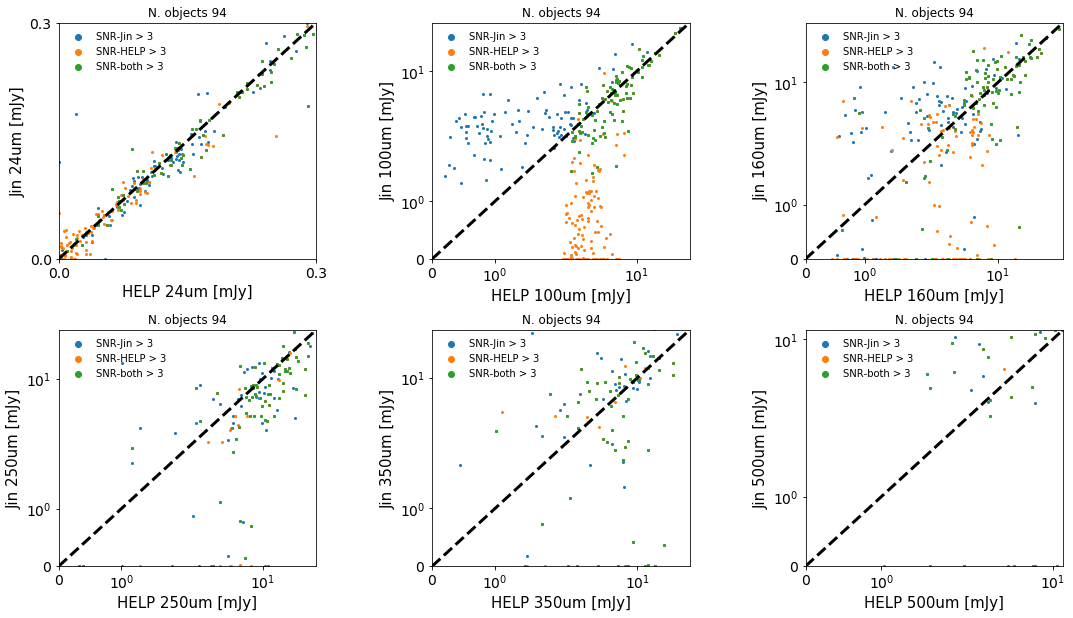

In [17]:
# Plots for the three different SNR scenarios in our sample

X = np.linspace(0, 500, 100)

fig, axs = plt.subplots(2,3, figsize=(18, 10), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.3, wspace = 0.45)

axs = axs.ravel()

for i in range(len(bands)):
    
#     For the limits
    x = jin_help_3dhst[bands_help[i]]
    y = jin_help_3dhst[bands_jin[i]]
    
#     For the SNR
    snr_1 = jin_help_3dhst['F100']/jin_help_3dhst['DF100']
    snr_2 = jin_help_3dhst['help_f_pacs_green']/jin_help_3dhst['help_ferr_pacs_green']
    
#     For the contraints
    l     = jin_help_3dhst[snr_1 > 3]
    m     = jin_help_3dhst[snr_2 > 3]
    n     = jin_help_3dhst[(snr_1 > 3) & (snr_2 > 3)]
    
#     Plotting each constraint
    axs[i].scatter(l[bands_help[i]], l[bands_jin[i]], s = 4, c = 'C0', label = 'SNR-Jin > 3')
    axs[i].scatter(m[bands_help[i]], m[bands_jin[i]], s = 4, c = 'C1', label = 'SNR-HELP > 3')
    axs[i].scatter(n[bands_help[i]], n[bands_jin[i]], s = 4, c = 'C2', label = 'SNR-both > 3')    
        
    axs[i].plot(X, X, '--', lw = 3, c = 'k')
    axs[i].set_ylabel('Jin %s [mJy]'%bands[i], fontsize = 15)
    axs[i].set_xlabel('HELP %s [mJy]'%bands[i], fontsize = 15)
    axs[i].set_xscale('symlog')
    axs[i].set_yscale('symlog')
    axs[i].set_xlim(0, np.nanpercentile(y, 99.9))
    axs[i].set_ylim(0, np.nanpercentile(y, 99.9))
    axs[i].set_title('N. objects %i'%len(n[bands_help[i]]))
    axs[i].tick_params(axis = 'both', which = 'major', labelsize = 14)
    axs[i].legend(frameon = False, prop = {'size': 10}, markerscale = 3 , loc = 'upper left')
    
    if (i == 0):
        axs[i].set_xlim(0, 0.3)
        axs[i].set_ylim(0, 0.3)
        axs[i].xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
        axs[i].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

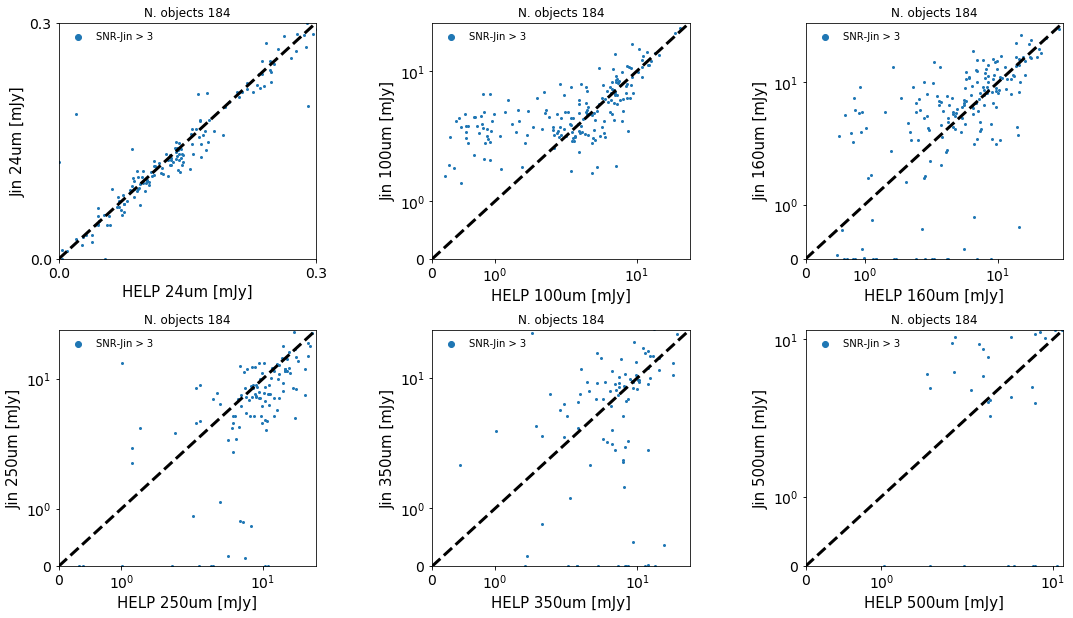

In [18]:
# Just selecting objects with SNR > 3 in Jin catalog

X = np.linspace(0, 500, 100)

fig, axs = plt.subplots(2,3, figsize=(18, 10), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.3, wspace = 0.45)

axs = axs.ravel()

for i in range(len(bands)):
    
#     For the limits
    x = jin_help_3dhst[bands_help[i]]
    y = jin_help_3dhst[bands_jin[i]]
    
#     For the SNR
    snr_1 = jin_help_3dhst['F100']/jin_help_3dhst['DF100']
    
#     For the contraints
    l     = jin_help_3dhst[snr_1 > 3]
    l     = l[(l['F100'] > 0) & (l['F160'] > 0)]
    
#     Plotting each constraint
    axs[i].scatter(l[bands_help[i]], l[bands_jin[i]], s = 4, c = 'C0', label = 'SNR-Jin > 3')
        
    axs[i].plot(X, X, '--', lw = 3, c = 'k')
    axs[i].set_ylabel('Jin %s [mJy]'%bands[i], fontsize = 15)
    axs[i].set_xlabel('HELP %s [mJy]'%bands[i], fontsize = 15)
    axs[i].set_xscale('symlog')
    axs[i].set_yscale('symlog')
    axs[i].set_xlim(0, np.nanpercentile(y, 99.9))
    axs[i].set_ylim(0, np.nanpercentile(y, 99.9))
    axs[i].set_title('N. objects %i'%len(l[bands_help[i]]))
    axs[i].tick_params(axis = 'both', which = 'major', labelsize = 14)
    axs[i].legend(frameon = False, prop = {'size': 10}, markerscale = 3 , loc = 'upper left')
    
    if (i == 0):
        axs[i].set_xlim(0, 0.3)
        axs[i].set_ylim(0, 0.3)
        axs[i].xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
        axs[i].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

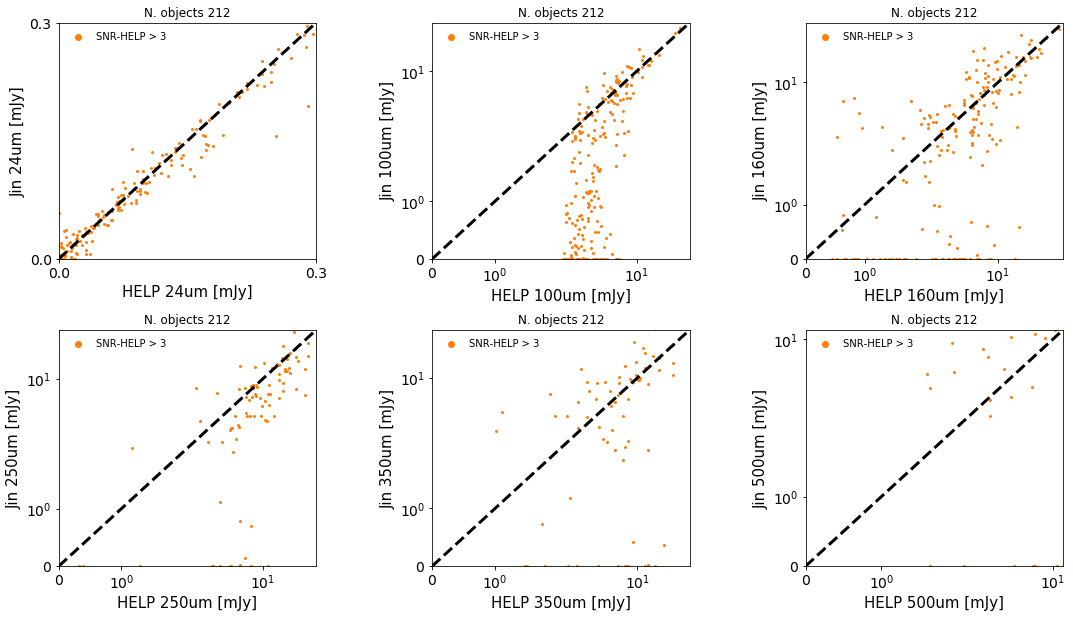

In [19]:
# Just selecting objects with SNR > 3 in HELP catalog

X = np.linspace(0, 500, 100)

fig, axs = plt.subplots(2,3, figsize=(18, 10), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.3, wspace = 0.45)

axs = axs.ravel()

for i in range(len(bands)):
    
#     For the limits
    x = jin_help_3dhst[bands_help[i]]
    y = jin_help_3dhst[bands_jin[i]]
    
#     For the SNR
    snr_2 = jin_help_3dhst['help_f_pacs_green']/jin_help_3dhst['help_ferr_pacs_green']
    
#     For the contraints
    m     = jin_help_3dhst[snr_2 > 3]
    m     = m[(m['help_f_pacs_green'] > 0) & (m['help_f_pacs_red'] > 0)]
    
#     Plotting each constraint
    axs[i].scatter(m[bands_help[i]], m[bands_jin[i]], s = 4, c = 'C1', label = 'SNR-HELP > 3')
        
    axs[i].plot(X, X, '--', lw = 3, c = 'k')
    axs[i].set_ylabel('Jin %s [mJy]'%bands[i], fontsize = 15)
    axs[i].set_xlabel('HELP %s [mJy]'%bands[i], fontsize = 15)
    axs[i].set_xscale('symlog')
    axs[i].set_yscale('symlog')
    axs[i].set_xlim(0, np.nanpercentile(y, 99.9))
    axs[i].set_ylim(0, np.nanpercentile(y, 99.9))
    axs[i].set_title('N. objects %i'%len(m[bands_help[i]]))
    axs[i].tick_params(axis = 'both', which = 'major', labelsize = 14)
    axs[i].legend(frameon = False, prop = {'size': 10}, markerscale = 3 , loc = 'upper left')
    
    if (i == 0):
        axs[i].set_xlim(0, 0.3)
        axs[i].set_ylim(0, 0.3)
        axs[i].xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
        axs[i].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

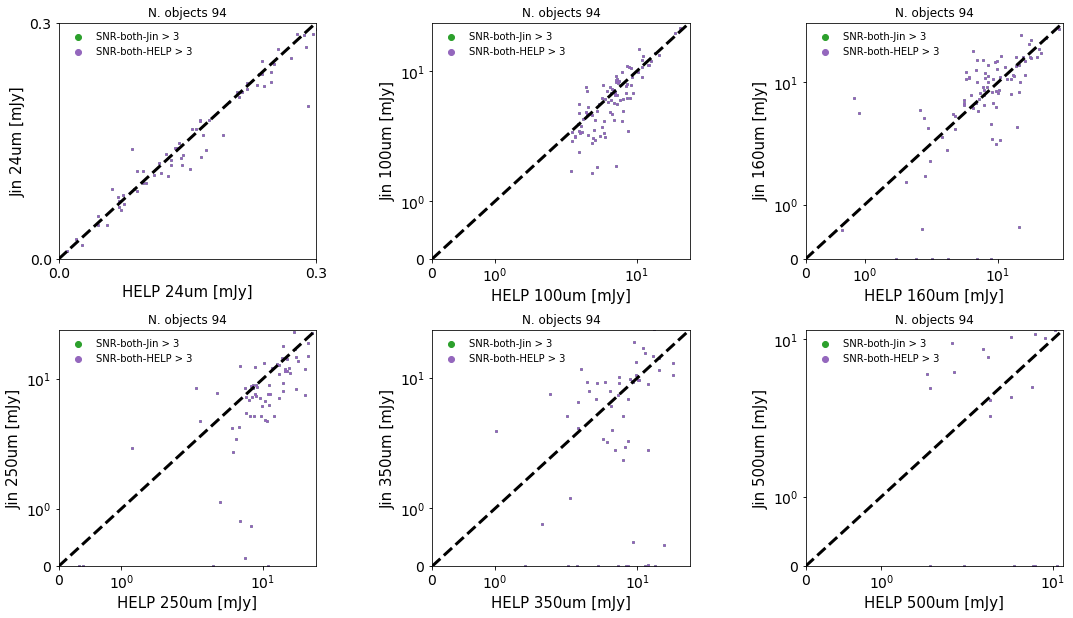

In [20]:
# SNR >3 in Jin  and HELP catalogs

X = np.linspace(0, 500, 100)

fig, axs = plt.subplots(2,3, figsize=(18, 10), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.3, wspace = 0.45)

axs = axs.ravel()

for i in range(len(bands)):
    
#     For the limits
    x = jin_help_3dhst[bands_help[i]]
    y = jin_help_3dhst[bands_jin[i]]
    
#     For the SNR
    snr_1 = jin_help_3dhst['F100']/jin_help_3dhst['DF100']
    snr_2 = jin_help_3dhst['help_f_pacs_green']/jin_help_3dhst['help_ferr_pacs_green']
    
#     For the contraints
    n     = jin_help_3dhst[(snr_1 > 3) & (snr_2 > 3)]
    q     = n[(n['F100'] > 0) & (n['F160'] > 0)]
    p     = n[(n['help_f_pacs_green'] > 0) & (n['help_f_pacs_red'] > 0)]
    
#     Plotting each constraint
    axs[i].scatter(q[bands_help[i]], q[bands_jin[i]], s = 4, c = 'C2', label = 'SNR-both-Jin > 3')    
    axs[i].scatter(p[bands_help[i]], p[bands_jin[i]], s = 4, c = 'C4', label = 'SNR-both-HELP > 3')    

    axs[i].plot(X, X, '--', lw = 3, c = 'k')
    axs[i].set_ylabel('Jin %s [mJy]'%bands[i], fontsize = 15)
    axs[i].set_xlabel('HELP %s [mJy]'%bands[i], fontsize = 15)
    axs[i].set_xscale('symlog')
    axs[i].set_yscale('symlog')
    axs[i].set_xlim(0, np.nanpercentile(y, 99.9))
    axs[i].set_ylim(0, np.nanpercentile(y, 99.9))
    axs[i].set_title('N. objects %i'%len(n[bands_help[i]]))
    axs[i].tick_params(axis = 'both', which = 'major', labelsize = 14)
    axs[i].legend(frameon = False, prop = {'size': 10}, markerscale = 3 , loc = 'upper left')
    
    if (i == 0):
        axs[i].set_xlim(0, 0.3)
        axs[i].set_ylim(0, 0.3)
        axs[i].xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
        axs[i].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

# New files for CIGALE 

### Based on the analysis performed above a sample with PACS and SNR>3 in PACS data is created for Jin, HELP, and Jin_HELP separately

In [14]:
sample = jin_help_3dhst

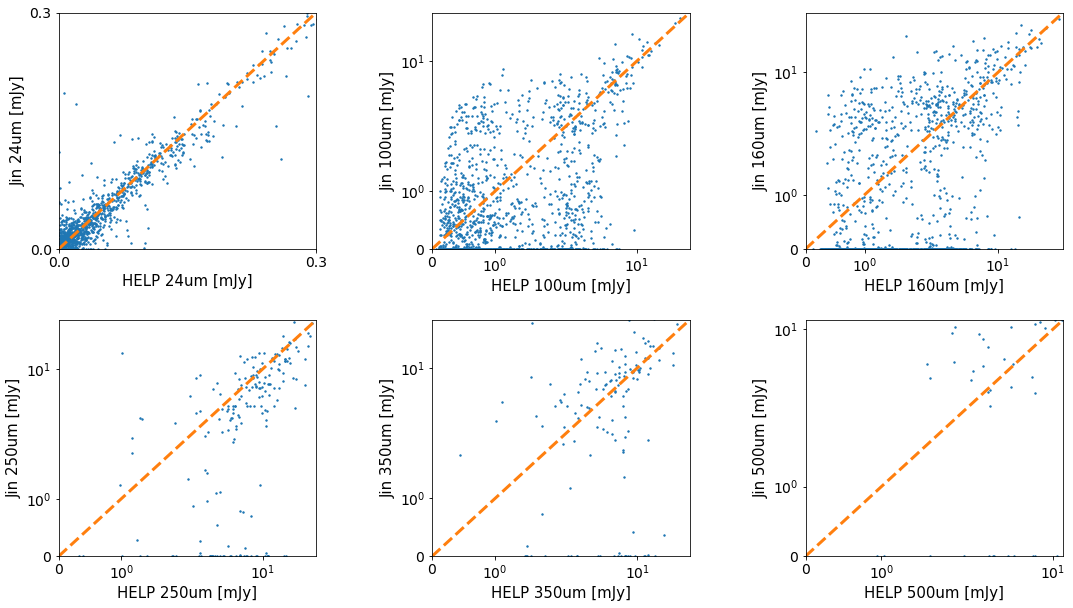

In [24]:
# Checking the sample to be consistent in the expected units range
# after performing the unit conversion

X = np.linspace(0, 500, 100)

fig, axs = plt.subplots(2,3, figsize=(18, 10), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.3, wspace = 0.45)

axs = axs.ravel()

for i in range(len(bands)):
    
    x = sample[bands_help[i]]
    y = sample[bands_jin[i]]
    
    axs[i].scatter(x, y, s = 2, c = 'C0')
    axs[i].plot(X, X, '--', lw = 3, c = 'C1')
    axs[i].set_ylabel('Jin %s [mJy]'%bands[i], fontsize = 15)
    axs[i].set_xlabel('HELP %s [mJy]'%bands[i], fontsize = 15)
    axs[i].set_xscale('symlog')
    axs[i].set_yscale('symlog')
    axs[i].set_xlim(0, np.nanpercentile(y, 99.9))
    axs[i].set_ylim(0, np.nanpercentile(y, 99.9))
    axs[i].tick_params(axis = 'both', which = 'major', labelsize = 14)
    
    if (i == 0):
        axs[i].set_xlim(0, 0.3)
        axs[i].set_ylim(0, 0.3)
        axs[i].xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
        axs[i].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

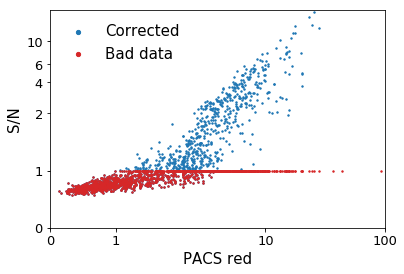

In [61]:
# To check if indeed the new corrected values were added

plt.figure()
plt.scatter(sample['help_f_pacs_red'], sample['help_f_pacs_red']/sample['help_ferr_pacs_red'], label = 'Corrected', s = 2, c = 'C0')
plt.scatter(sample['herschel.pacs.160'], sample['herschel.pacs.160']/sample['herschel.pacs.160_err'], label = 'Bad data', s = 2, c = 'C3')
plt.xlim(0,100)
plt.ylim(0,20)
plt.xscale('symlog')
plt.yscale('symlog')
plt.xticks([0, 1, 10, 100], [0, 1, 10, 100])
plt.yticks([0, 1, 2, 4, 6, 10], [0, 1, 2, 4, 6, 10])
plt.ylabel('S/N', fontsize = 15)
plt.xlabel('PACS red', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 13)
plt.legend(frameon = False, prop = {'size': 15}, markerscale = 3 , loc = 'upper left');

# Jin IR sample

# Pre-selecting a sub-sample with SNR > 3 in Jin's 100 $\mu$m data

This corresponds to a sample in which PACS 100 $\mu$m fluxes are high in Jin's data but low for HELP data

In [95]:
# Creating CIGALE's file for SNR in Jin catalog 

snr_1       = sample['F100']/sample['DF100']
sample_1    = sample[(snr_1 > 3) & (snr_1 < 6)]
sample_1    = sample_1[(sample_1['F100'] > 0) & (sample_1['F160'] > 0)]

# Saving file with HELP's photometric data in PACS and SPIRE bands

# developer
Jin_help_dev = Table([sample_1['id_1'], sample_1['redshift'],\
                      sample_1['galex.NUV'], sample_1['galex.NUV_err'],\
                      sample_1['cfht.megacam.u'], sample_1['cfht.megacam.u_err'],\
                      sample_1['subaru.suprime.B'], sample_1['subaru.suprime.B_err'],\
                      sample_1['subaru.suprime.V'], sample_1['subaru.suprime.V_err'],\
                      sample_1['subaru.suprime.r'], sample_1['subaru.suprime.r_err'],\
                      sample_1['subaru.suprime.i'], sample_1['subaru.suprime.i_err'],\
                      sample_1['subaru.suprime.z'], sample_1['subaru.suprime.z_err'],\
                      sample_1['subaru.hsc.y'], sample_1['subaru.hsc.y_err'],\
                      sample_1['UKIRT_WFCJ'], sample_1['UKIRT_WFCJ_err'],\
                      sample_1['cfht.wircam.H'], sample_1['cfht.wircam.H_err'],\
                      sample_1['WFCAM_K'], sample_1['WFCAM_K_err'],\
                      sample_1['IRAC1'], sample_1['IRAC1_err'],\
                      sample_1['IRAC2'], sample_1['IRAC2_err'],\
                      sample_1['IRAC3'], sample_1['IRAC3_err'],\
                      sample_1['IRAC4'], sample_1['IRAC4_err'],\
                      sample_1['spitzer.mips.24'], sample_1['spitzer.mips.24_err'],\
                      sample_1['herschel.pacs.100'], sample_1['herschel.pacs.100_err'],\
                      sample_1['help_f_pacs_red'], sample_1['help_ferr_pacs_red'],\
                      sample_1['herschel.spire.PSW'], sample_1['herschel.spire.PSW_err'],\
                      sample_1['herschel.spire.PMW'], sample_1['herschel.spire.PMW_err'],\
                      sample_1['herschel.spire.PLW'], sample_1['herschel.spire.PLW_err']],\
                     names = ('id', 'redshift', 'galex.NUV', 'galex.NUV_err', 'cfht.megacam.u', 'cfht.megacam.u_err',\
                              'subaru.suprime.B', 'subaru.suprime.B_err', 'subaru.suprime.V', 'subaru.suprime.V_err',\
                              'subaru.suprime.r', 'subaru.suprime.r_err', 'subaru.suprime.i', 'subaru.suprime.i_err',\
                              'subaru.suprime.z', 'subaru.suprime.z_err', 'subaru.hsc.y', 'subaru.hsc.y_err',\
                              'UKIRT_WFCJ', 'UKIRT_WFCJ_err', 'cfht.wircam.H', 'cfht.wircam.H_err',\
                              'WFCAM_K', 'WFCAM_K_err', 'IRAC1', 'IRAC1_err',\
                              'IRAC2', 'IRAC2_err', 'IRAC3', 'IRAC3_err',\
                              'IRAC4', 'IRAC4_err', 'spitzer.mips.24', 'spitzer.mips.24_err',\
                              'herschel.pacs.100', 'herschel.pacs.100_err',\
                              'herschel.pacs.160', 'herschel.pacs.160_err',\
                              'herschel.spire.PSW', 'herschel.spire.PSW_err', 'herschel.spire.PMW',\
                              'herschel.spire.PMW_err', 'herschel.spire.PLW', 'herschel.spire.PLW_err'))

os.system('rm -rf /home/jvilla/Documents/PhD_2018/3DHST_Data/'
          'COSMOS/Jin_Daddi_COSMOS/CIGALE-developer_Jin_HELP_WonkyFeatures.fits')
Jin_help_dev.write('/home/jvilla/Documents/PhD_2018/3DHST_Data/'
          'COSMOS/Jin_Daddi_COSMOS/CIGALE-developer_Jin_HELP_WonkyFeatures.fits', format='fits')

# cigalon
Jin_help_cig = Table([sample_1['id_1'], sample_1['redshift'],\
             sample_1['galex.NUV'], sample_1['galex.NUV_err'],\
             sample_1['cfht.megacam.u'], sample_1['cfht.megacam.u_err'],\
             sample_1['subaru.suprime.B'], sample_1['subaru.suprime.B_err'],\
             sample_1['subaru.suprime.V'], sample_1['subaru.suprime.V_err'],\
             sample_1['subaru.suprime.r'], sample_1['subaru.suprime.r_err'],\
             sample_1['subaru.suprime.i'], sample_1['subaru.suprime.i_err'],\
             sample_1['subaru.suprime.z'], sample_1['subaru.suprime.z_err'],\
             sample_1['subaru.hsc.y'], sample_1['subaru.hsc.y_err'],\
             sample_1['UKIRT_WFCJ'], sample_1['UKIRT_WFCJ_err'],\
             sample_1['cfht.wircam.H'], sample_1['cfht.wircam.H_err'],\
             sample_1['WFCAM_K'], sample_1['WFCAM_K_err'],\
             sample_1['IRAC1'], sample_1['IRAC1_err'],\
             sample_1['IRAC2'], sample_1['IRAC2_err'],\
             sample_1['IRAC3'], sample_1['IRAC3_err'],\
             sample_1['IRAC4'], sample_1['IRAC4_err'],\
             sample_1['spitzer.mips.24'], sample_1['spitzer.mips.24_err'],\
             sample_1['herschel.pacs.100'], sample_1['herschel.pacs.100_err'],\
             sample_1['help_f_pacs_red'], sample_1['help_ferr_pacs_red'],\
             sample_1['herschel.spire.PSW'], sample_1['herschel.spire.PSW_err'],\
             sample_1['herschel.spire.PMW'], sample_1['herschel.spire.PMW_err'],\
             sample_1['herschel.spire.PLW'], sample_1['herschel.spire.PLW_err']],\
            names = ('id', 'redshift', 'galex_nuv', 'galex_nuv_err', 'megacam_u', 'megacam_u_err',\
                        'suprime_b', 'suprime_b_err', 'suprime_v', 'suprime_v_err',\
                        'suprime_r', 'suprime_r_err', 'suprime_i', 'suprime_i_err',\
                        'suprime_z', 'suprime_z_err', 'suprime_y', 'suprime_y_err',\
                        'vista_j', 'vista_j_err', 'vista_h', 'vista_h_err',\
                        'vista_ks', 'vista_ks_err', 'IRAC_CH1', 'IRAC_CH1_err',\
                        'IRAC_CH2', 'IRAC_CH2_err', 'IRAC_CH3', 'IRAC_CH3_err',\
                        'IRAC_CH4', 'IRAC_CH4_err', 'mips_24', 'mips_24_err',\
                        'pacs_green', 'pacs_green_err',\
                        'pacs_red', 'pacs_red_err',\
                        'spire_250', 'spire_250_err', 'spire_350',\
                        'spire_350_err', 'spire_500', 'spire_500_err'))

os.system('rm -rf /home/jvilla/Documents/PhD_2018/3DHST_Data/'
          'COSMOS/Jin_Daddi_COSMOS/CIGALE-cigalon_Jin_HELP_WonkyFeatures.fits')
Jin_help_cig.write('/home/jvilla/Documents/PhD_2018/3DHST_Data/'
          'COSMOS/Jin_Daddi_COSMOS/CIGALE-cigalon_Jin_HELP_WonkyFeatures.fits', format='fits')

#===================================================================================================================

# Saving file with Jin's photometric data in PACS and SPIRE bands

# developer
Jin_Jin_dev = Table([sample_1['id_1'], sample_1['redshift'],\
             sample_1['galex.NUV'], sample_1['galex.NUV_err'],\
             sample_1['cfht.megacam.u'], sample_1['cfht.megacam.u_err'],\
             sample_1['subaru.suprime.B'], sample_1['subaru.suprime.B_err'],\
             sample_1['subaru.suprime.V'], sample_1['subaru.suprime.V_err'],\
             sample_1['subaru.suprime.r'], sample_1['subaru.suprime.r_err'],\
             sample_1['subaru.suprime.i'], sample_1['subaru.suprime.i_err'],\
             sample_1['subaru.suprime.z'], sample_1['subaru.suprime.z_err'],\
             sample_1['subaru.hsc.y'], sample_1['subaru.hsc.y_err'],\
             sample_1['UKIRT_WFCJ'], sample_1['UKIRT_WFCJ_err'],\
             sample_1['cfht.wircam.H'], sample_1['cfht.wircam.H_err'],\
             sample_1['WFCAM_K'], sample_1['WFCAM_K_err'],\
             sample_1['IRAC1'], sample_1['IRAC1_err'],\
             sample_1['IRAC2'], sample_1['IRAC2_err'],\
             sample_1['IRAC3'], sample_1['IRAC3_err'],\
             sample_1['IRAC4'], sample_1['IRAC4_err'],\
             sample_1['spitzer.mips.24'], sample_1['spitzer.mips.24_err'],\
             sample_1['F100'], sample_1['DF100'], sample_1['F160'], sample_1['DF160'],\
             sample_1['F250'], sample_1['DF250'], sample_1['F350'], sample_1['DF350'],\
             sample_1['F500'], sample_1['DF500']],\
            names = ('id', 'redshift', 'galex.NUV', 'galex.NUV_err', 'cfht.megacam.u', 'cfht.megacam.u_err',\
                        'subaru.suprime.B', 'subaru.suprime.B_err', 'subaru.suprime.V', 'subaru.suprime.V_err',\
                        'subaru.suprime.r', 'subaru.suprime.r_err', 'subaru.suprime.i', 'subaru.suprime.i_err',\
                        'subaru.suprime.z', 'subaru.suprime.z_err', 'subaru.hsc.y', 'subaru.hsc.y_err',\
                        'UKIRT_WFCJ', 'UKIRT_WFCJ_err', 'cfht.wircam.H', 'cfht.wircam.H_err',\
                        'WFCAM_K', 'WFCAM_K_err', 'IRAC1', 'IRAC1_err',\
                        'IRAC2', 'IRAC2_err', 'IRAC3', 'IRAC3_err',\
                        'IRAC4', 'IRAC4_err', 'spitzer.mips.24', 'spitzer.mips.24_err',\
                        'herschel.pacs.100', 'herschel.pacs.100_err',\
                        'herschel.pacs.160', 'herschel.pacs.160_err',\
                        'herschel.spire.PSW', 'herschel.spire.PSW_err', 'herschel.spire.PMW',\
                        'herschel.spire.PMW_err', 'herschel.spire.PLW', 'herschel.spire.PLW_err'))

os.system('rm -rf /home/jvilla/Documents/PhD_2018/3DHST_Data/'
          'COSMOS/Jin_Daddi_COSMOS/CIGALE-developer_Jin_HELP_WonkyFeatures.fits')
Jin_Jin_dev.write('/home/jvilla/Documents/PhD_2018/3DHST_Data/'
          'COSMOS/Jin_Daddi_COSMOS/CIGALE-developer_Jin_Jin_WonkyFeatures.fits', format='fits')

# cigalon
Jin_Jin_cig = Table([sample_1['id_1'], sample_1['redshift'],\
             sample_1['galex.NUV'], sample_1['galex.NUV_err'],\
             sample_1['cfht.megacam.u'], sample_1['cfht.megacam.u_err'],\
             sample_1['subaru.suprime.B'], sample_1['subaru.suprime.B_err'],\
             sample_1['subaru.suprime.V'], sample_1['subaru.suprime.V_err'],\
             sample_1['subaru.suprime.r'], sample_1['subaru.suprime.r_err'],\
             sample_1['subaru.suprime.i'], sample_1['subaru.suprime.i_err'],\
             sample_1['subaru.suprime.z'], sample_1['subaru.suprime.z_err'],\
             sample_1['subaru.hsc.y'], sample_1['subaru.hsc.y_err'],\
             sample_1['UKIRT_WFCJ'], sample_1['UKIRT_WFCJ_err'],\
             sample_1['cfht.wircam.H'], sample_1['cfht.wircam.H_err'],\
             sample_1['WFCAM_K'], sample_1['WFCAM_K_err'],\
             sample_1['IRAC1'], sample_1['IRAC1_err'],\
             sample_1['IRAC2'], sample_1['IRAC2_err'],\
             sample_1['IRAC3'], sample_1['IRAC3_err'],\
             sample_1['IRAC4'], sample_1['IRAC4_err'],\
             sample_1['spitzer.mips.24'], sample_1['spitzer.mips.24_err'],\
             sample_1['F100'], sample_1['DF100'], sample_1['F160'], sample_1['DF160'],\
             sample_1['F250'], sample_1['DF250'], sample_1['F350'], sample_1['DF350'],\
             sample_1['F500'], sample_1['DF500']],\
            names = ('id', 'redshift', 'galex_nuv', 'galex_nuv_err', 'megacam_u', 'megacam_u_err',\
                        'suprime_b', 'suprime_b_err', 'suprime_v', 'suprime_v_err',\
                        'suprime_r', 'suprime_r_err', 'suprime_i', 'suprime_i_err',\
                        'suprime_z', 'suprime_z_err', 'suprime_y', 'suprime_y_err',\
                        'vista_j', 'vista_j_err', 'vista_h', 'vista_h_err',\
                        'vista_ks', 'vista_ks_err', 'IRAC_CH1', 'IRAC_CH1_err',\
                        'IRAC_CH2', 'IRAC_CH2_err', 'IRAC_CH3', 'IRAC_CH3_err',\
                        'IRAC_CH4', 'IRAC_CH4_err', 'mips_24', 'mips_24_err',\
                        'pacs_green', 'pacs_green_err',\
                        'pacs_red', 'pacs_red_err',\
                        'spire_250', 'spire_250_err', 'spire_350',\
                        'spire_350_err', 'spire_500', 'spire_500_err'))

os.system('rm -rf /home/jvilla/Documents/PhD_2018/3DHST_Data/'
          'COSMOS/Jin_Daddi_COSMOS/CIGALE-cigalon_Jin_HELP_WonkyFeatures.fits')
Jin_Jin_cig.write('/home/jvilla/Documents/PhD_2018/3DHST_Data/'
          'COSMOS/Jin_Daddi_COSMOS/CIGALE-cigalon_Jin_Jin_WonkyFeatures.fits', format='fits')

# HELP IR sample

# Pre-selecting a sub-sample with SNR > 3 in HELP's 100 $\mu$m data

This corresponds to a sample in which PACS 100 $\mu$m fluxes are low in Jin's data but high for HELP data

In [99]:
# Creating CIGALE's file for SNR in HELP catalog 

snr_2       = sample['help_f_pacs_green']/sample['help_ferr_pacs_green']
sample_2    = sample[(snr_2 > 3) & (snr_2 < 6)]
sample_2    = sample_2[(sample_2['help_f_pacs_green'] > 0) & (sample_2['help_f_pacs_red'] > 0)]

# Saving file with HELP's photometric data in PACS and SPIRE bands

# developer
help_help_dev = Table([sample_2['id_1'], sample_2['redshift'],\
             sample_2['galex.NUV'], sample_2['galex.NUV_err'],\
             sample_2['cfht.megacam.u'], sample_2['cfht.megacam.u_err'],\
             sample_2['subaru.suprime.B'], sample_2['subaru.suprime.B_err'],\
             sample_2['subaru.suprime.V'], sample_2['subaru.suprime.V_err'],\
             sample_2['subaru.suprime.r'], sample_2['subaru.suprime.r_err'],\
             sample_2['subaru.suprime.i'], sample_2['subaru.suprime.i_err'],\
             sample_2['subaru.suprime.z'], sample_2['subaru.suprime.z_err'],\
             sample_2['subaru.hsc.y'], sample_2['subaru.hsc.y_err'],\
             sample_2['UKIRT_WFCJ'], sample_2['UKIRT_WFCJ_err'],\
             sample_2['cfht.wircam.H'], sample_2['cfht.wircam.H_err'],\
             sample_2['WFCAM_K'], sample_2['WFCAM_K_err'],\
             sample_2['IRAC1'], sample_2['IRAC1_err'],\
             sample_2['IRAC2'], sample_2['IRAC2_err'],\
             sample_2['IRAC3'], sample_2['IRAC3_err'],\
             sample_2['IRAC4'], sample_2['IRAC4_err'],\
             sample_2['spitzer.mips.24'], sample_2['spitzer.mips.24_err'],\
             sample_2['herschel.pacs.100'], sample_2['herschel.pacs.100_err'],\
             sample_2['help_f_pacs_red'], sample_2['help_ferr_pacs_red'],\
             sample_2['herschel.spire.PSW'], sample_2['herschel.spire.PSW_err'],\
             sample_2['herschel.spire.PMW'], sample_2['herschel.spire.PMW_err'],\
             sample_2['herschel.spire.PLW'], sample_2['herschel.spire.PLW_err']],\
            names = ('id', 'redshift', 'galex.NUV', 'galex.NUV_err', 'cfht.megacam.u', 'cfht.megacam.u_err',\
                        'subaru.suprime.B', 'subaru.suprime.B_err', 'subaru.suprime.V', 'subaru.suprime.V_err',\
                        'subaru.suprime.r', 'subaru.suprime.r_err', 'subaru.suprime.i', 'subaru.suprime.i_err',\
                        'subaru.suprime.z', 'subaru.suprime.z_err', 'subaru.hsc.y', 'subaru.hsc.y_err',\
                        'UKIRT_WFCJ', 'UKIRT_WFCJ_err', 'cfht.wircam.H', 'cfht.wircam.H_err',\
                        'WFCAM_K', 'WFCAM_K_err', 'IRAC1', 'IRAC1_err',\
                        'IRAC2', 'IRAC2_err', 'IRAC3', 'IRAC3_err',\
                        'IRAC4', 'IRAC4_err', 'spitzer.mips.24', 'spitzer.mips.24_err',\
                        'herschel.pacs.100', 'herschel.pacs.100_err',\
                        'herschel.pacs.160', 'herschel.pacs.160_err',\
                        'herschel.spire.PSW', 'herschel.spire.PSW_err', 'herschel.spire.PMW',\
                        'herschel.spire.PMW_err', 'herschel.spire.PLW', 'herschel.spire.PLW_err'))

os.system('rm -rf /home/jvilla/Documents/PhD_2018/3DHST_Data/'
          'COSMOS/Jin_Daddi_COSMOS/CIGALE-developer_Jin_HELP_WonkyFeatures.fits')
help_help_dev.write('/home/jvilla/Documents/PhD_2018/3DHST_Data/'
          'COSMOS/Jin_Daddi_COSMOS/CIGALE-developer_HELP_HELP_WonkyFeatures.fits', format='fits')

# cigalon
help_help_cig = Table([sample_2['id_1'], sample_2['redshift'],\
             sample_2['galex.NUV'], sample_2['galex.NUV_err'],\
             sample_2['cfht.megacam.u'], sample_2['cfht.megacam.u_err'],\
             sample_2['subaru.suprime.B'], sample_2['subaru.suprime.B_err'],\
             sample_2['subaru.suprime.V'], sample_2['subaru.suprime.V_err'],\
             sample_2['subaru.suprime.r'], sample_2['subaru.suprime.r_err'],\
             sample_2['subaru.suprime.i'], sample_2['subaru.suprime.i_err'],\
             sample_2['subaru.suprime.z'], sample_2['subaru.suprime.z_err'],\
             sample_2['subaru.hsc.y'], sample_2['subaru.hsc.y_err'],\
             sample_2['UKIRT_WFCJ'], sample_2['UKIRT_WFCJ_err'],\
             sample_2['cfht.wircam.H'], sample_2['cfht.wircam.H_err'],\
             sample_2['WFCAM_K'], sample_2['WFCAM_K_err'],\
             sample_2['IRAC1'], sample_2['IRAC1_err'],\
             sample_2['IRAC2'], sample_2['IRAC2_err'],\
             sample_2['IRAC3'], sample_2['IRAC3_err'],\
             sample_2['IRAC4'], sample_2['IRAC4_err'],\
             sample_2['spitzer.mips.24'], sample_2['spitzer.mips.24_err'],\
             sample_2['herschel.pacs.100'], sample_2['herschel.pacs.100_err'],\
             sample_2['help_f_pacs_red'], sample_2['help_ferr_pacs_red'],\
             sample_2['herschel.spire.PSW'], sample_2['herschel.spire.PSW_err'],\
             sample_2['herschel.spire.PMW'], sample_2['herschel.spire.PMW_err'],\
             sample_2['herschel.spire.PLW'], sample_2['herschel.spire.PLW_err']],\
            names = ('id', 'redshift', 'galex_nuv', 'galex_nuv_err', 'megacam_u', 'megacam_u_err',\
                        'suprime_b', 'suprime_b_err', 'suprime_v', 'suprime_v_err',\
                        'suprime_r', 'suprime_r_err', 'suprime_i', 'suprime_i_err',\
                        'suprime_z', 'suprime_z_err', 'suprime_y', 'suprime_y_err',\
                        'vista_j', 'vista_j_err', 'vista_h', 'vista_h_err',\
                        'vista_ks', 'vista_ks_err', 'IRAC_CH1', 'IRAC_CH1_err',\
                        'IRAC_CH2', 'IRAC_CH2_err', 'IRAC_CH3', 'IRAC_CH3_err',\
                        'IRAC_CH4', 'IRAC_CH4_err', 'mips_24', 'mips_24_err',\
                        'pacs_green', 'pacs_green_err',\
                        'pacs_red', 'pacs_red_err',\
                        'spire_250', 'spire_250_err', 'spire_350',\
                        'spire_350_err', 'spire_500', 'spire_500_err'))

os.system('rm -rf /home/jvilla/Documents/PhD_2018/3DHST_Data/'
          'COSMOS/Jin_Daddi_COSMOS/CIGALE-cigalon_Jin_HELP_WonkyFeatures.fits')
help_help_cig.write('/home/jvilla/Documents/PhD_2018/3DHST_Data/'
          'COSMOS/Jin_Daddi_COSMOS/CIGALE-cigalon_HELP_HELP_WonkyFeatures.fits', format='fits')

#===================================================================================================================

# Saving file with Jin's photometric data in PACS and SPIRE bands

# developer
help_Jin_dev = Table([sample_2['id_1'], sample_2['redshift'],\
             sample_2['galex.NUV'], sample_2['galex.NUV_err'],\
             sample_2['cfht.megacam.u'], sample_2['cfht.megacam.u_err'],\
             sample_2['subaru.suprime.B'], sample_2['subaru.suprime.B_err'],\
             sample_2['subaru.suprime.V'], sample_2['subaru.suprime.V_err'],\
             sample_2['subaru.suprime.r'], sample_2['subaru.suprime.r_err'],\
             sample_2['subaru.suprime.i'], sample_2['subaru.suprime.i_err'],\
             sample_2['subaru.suprime.z'], sample_2['subaru.suprime.z_err'],\
             sample_2['subaru.hsc.y'], sample_2['subaru.hsc.y_err'],\
             sample_2['UKIRT_WFCJ'], sample_2['UKIRT_WFCJ_err'],\
             sample_2['cfht.wircam.H'], sample_2['cfht.wircam.H_err'],\
             sample_2['WFCAM_K'], sample_2['WFCAM_K_err'],\
             sample_2['IRAC1'], sample_2['IRAC1_err'],\
             sample_2['IRAC2'], sample_2['IRAC2_err'],\
             sample_2['IRAC3'], sample_2['IRAC3_err'],\
             sample_2['IRAC4'], sample_2['IRAC4_err'],\
             sample_2['spitzer.mips.24'], sample_2['spitzer.mips.24_err'],\
             sample_2['F100'], sample_2['DF100'], sample_2['F160'], sample_2['DF160'],\
             sample_2['F250'], sample_2['DF250'], sample_2['F350'], sample_2['DF350'],\
             sample_2['F500'], sample_2['DF500']],\
            names = ('id', 'redshift', 'galex.NUV', 'galex.NUV_err', 'cfht.megacam.u', 'cfht.megacam.u_err',\
                        'subaru.suprime.B', 'subaru.suprime.B_err', 'subaru.suprime.V', 'subaru.suprime.V_err',\
                        'subaru.suprime.r', 'subaru.suprime.r_err', 'subaru.suprime.i', 'subaru.suprime.i_err',\
                        'subaru.suprime.z', 'subaru.suprime.z_err', 'subaru.hsc.y', 'subaru.hsc.y_err',\
                        'UKIRT_WFCJ', 'UKIRT_WFCJ_err', 'cfht.wircam.H', 'cfht.wircam.H_err',\
                        'WFCAM_K', 'WFCAM_K_err', 'IRAC1', 'IRAC1_err',\
                        'IRAC2', 'IRAC2_err', 'IRAC3', 'IRAC3_err',\
                        'IRAC4', 'IRAC4_err', 'spitzer.mips.24', 'spitzer.mips.24_err',\
                        'herschel.pacs.100', 'herschel.pacs.100_err',\
                        'herschel.pacs.160', 'herschel.pacs.160_err',\
                        'herschel.spire.PSW', 'herschel.spire.PSW_err', 'herschel.spire.PMW',\
                        'herschel.spire.PMW_err', 'herschel.spire.PLW', 'herschel.spire.PLW_err'))

os.system('rm -rf /home/jvilla/Documents/PhD_2018/3DHST_Data/'
          'COSMOS/Jin_Daddi_COSMOS/CIGALE-developer_Jin_HELP_WonkyFeatures.fits')
help_Jin_dev.write('/home/jvilla/Documents/PhD_2018/3DHST_Data/'
          'COSMOS/Jin_Daddi_COSMOS/CIGALE-developer_HELP_Jin_WonkyFeatures.fits', format='fits')

# cigalon
help_Jin_cig = Table([sample_2['id_1'], sample_2['redshift'],\
             sample_2['galex.NUV'], sample_2['galex.NUV_err'],\
             sample_2['cfht.megacam.u'], sample_2['cfht.megacam.u_err'],\
             sample_2['subaru.suprime.B'], sample_2['subaru.suprime.B_err'],\
             sample_2['subaru.suprime.V'], sample_2['subaru.suprime.V_err'],\
             sample_2['subaru.suprime.r'], sample_2['subaru.suprime.r_err'],\
             sample_2['subaru.suprime.i'], sample_2['subaru.suprime.i_err'],\
             sample_2['subaru.suprime.z'], sample_2['subaru.suprime.z_err'],\
             sample_2['subaru.hsc.y'], sample_2['subaru.hsc.y_err'],\
             sample_2['UKIRT_WFCJ'], sample_2['UKIRT_WFCJ_err'],\
             sample_2['cfht.wircam.H'], sample_2['cfht.wircam.H_err'],\
             sample_2['WFCAM_K'], sample_2['WFCAM_K_err'],\
             sample_2['IRAC1'], sample_2['IRAC1_err'],\
             sample_2['IRAC2'], sample_2['IRAC2_err'],\
             sample_2['IRAC3'], sample_2['IRAC3_err'],\
             sample_2['IRAC4'], sample_2['IRAC4_err'],\
             sample_2['spitzer.mips.24'], sample_2['spitzer.mips.24_err'],\
             sample_2['F100'], sample_2['DF100'], sample_2['F160'], sample_2['DF160'],\
             sample_2['F250'], sample_2['DF250'], sample_2['F350'], sample_2['DF350'],\
             sample_2['F500'], sample_2['DF500']],\
            names = ('id', 'redshift', 'galex_nuv', 'galex_nuv_err', 'megacam_u', 'megacam_u_err',\
                        'suprime_b', 'suprime_b_err', 'suprime_v', 'suprime_v_err',\
                        'suprime_r', 'suprime_r_err', 'suprime_i', 'suprime_i_err',\
                        'suprime_z', 'suprime_z_err', 'suprime_y', 'suprime_y_err',\
                        'vista_j', 'vista_j_err', 'vista_h', 'vista_h_err',\
                        'vista_ks', 'vista_ks_err', 'IRAC_CH1', 'IRAC_CH1_err',\
                        'IRAC_CH2', 'IRAC_CH2_err', 'IRAC_CH3', 'IRAC_CH3_err',\
                        'IRAC_CH4', 'IRAC_CH4_err', 'mips_24', 'mips_24_err',\
                        'pacs_green', 'pacs_green_err',\
                        'pacs_red', 'pacs_red_err',\
                        'spire_250', 'spire_250_err', 'spire_350',\
                        'spire_350_err', 'spire_500', 'spire_500_err'))

os.system('rm -rf /home/jvilla/Documents/PhD_2018/3DHST_Data/'
          'COSMOS/Jin_Daddi_COSMOS/CIGALE-cigalon_Jin_HELP_WonkyFeatures.fits')
help_Jin_cig.write('/home/jvilla/Documents/PhD_2018/3DHST_Data/'
          'COSMOS/Jin_Daddi_COSMOS/CIGALE-cigalon_HELP_Jin_WonkyFeatures.fits', format='fits')

# Selection in Spitzer 24 $\mu m$

In [31]:
# Creating CIGALE's file for SNR in HELP catalog 

snr_3       = sample['help_f_mips_24']/sample['help_ferr_mips_24']
sample_3    = sample[(snr_3 > 3) & (snr_3 < 6)]
sample_3    = sample_3[sample_3['help_f_mips_24'] > 0]

In [32]:
# cigalon
help_help_cig_test = Table([sample_3['id_1'], sample_3['redshift'],\
             sample_3['galex.NUV'], sample_3['galex.NUV_err'],\
             sample_3['cfht.megacam.u'], sample_3['cfht.megacam.u_err'],\
             sample_3['subaru.suprime.B'], sample_3['subaru.suprime.B_err'],\
             sample_3['subaru.suprime.V'], sample_3['subaru.suprime.V_err'],\
             sample_3['subaru.suprime.r'], sample_3['subaru.suprime.r_err'],\
             sample_3['subaru.suprime.i'], sample_3['subaru.suprime.i_err'],\
             sample_3['subaru.suprime.z'], sample_3['subaru.suprime.z_err'],\
             sample_3['subaru.hsc.y'], sample_3['subaru.hsc.y_err'],\
             sample_3['UKIRT_WFCJ'], sample_3['UKIRT_WFCJ_err'],\
             sample_3['cfht.wircam.H'], sample_3['cfht.wircam.H_err'],\
             sample_3['WFCAM_K'], sample_3['WFCAM_K_err'],\
             sample_3['IRAC1'], sample_3['IRAC1_err'],\
             sample_3['IRAC2'], sample_3['IRAC2_err'],\
             sample_3['IRAC3'], sample_3['IRAC3_err'],\
             sample_3['IRAC4'], sample_3['IRAC4_err'],\
             sample_3['spitzer.mips.24'], sample_3['spitzer.mips.24_err'],\
             sample_3['herschel.pacs.100'], sample_3['herschel.pacs.100_err'],\
             sample_3['help_f_pacs_red'], sample_3['help_ferr_pacs_red'],\
             sample_3['herschel.spire.PSW'], sample_3['herschel.spire.PSW_err'],\
             sample_3['herschel.spire.PMW'], sample_3['herschel.spire.PMW_err'],\
             sample_3['herschel.spire.PLW'], sample_3['herschel.spire.PLW_err']],\
            names = ('id', 'redshift', 'galex_nuv', 'galex_nuv_err', 'megacam_u', 'megacam_u_err',\
                        'suprime_b', 'suprime_b_err', 'suprime_v', 'suprime_v_err',\
                        'suprime_r', 'suprime_r_err', 'suprime_i', 'suprime_i_err',\
                        'suprime_z', 'suprime_z_err', 'suprime_y', 'suprime_y_err',\
                        'vista_j', 'vista_j_err', 'vista_h', 'vista_h_err',\
                        'vista_ks', 'vista_ks_err', 'IRAC_CH1', 'IRAC_CH1_err',\
                        'IRAC_CH2', 'IRAC_CH2_err', 'IRAC_CH3', 'IRAC_CH3_err',\
                        'IRAC_CH4', 'IRAC_CH4_err', 'mips_24', 'mips_24_err',\
                        'pacs_green', 'pacs_green_err',\
                        'pacs_red', 'pacs_red_err',\
                        'spire_250', 'spire_250_err', 'spire_350',\
                        'spire_350_err', 'spire_500', 'spire_500_err'))

os.system('rm -rf /home/jvilla/Documents/PhD_2018/3DHST_Data/'
          'COSMOS/Jin_Daddi_COSMOS/CIGALE-cigalon_Jin_HELP_WonkyFeatures_spitzer.fits')
help_help_cig_test.write('/home/jvilla/Documents/PhD_2018/3DHST_Data/'
          'COSMOS/Jin_Daddi_COSMOS/CIGALE-cigalon_HELP_HELP_WonkyFeatures_spitzer.fits', format='fits')

In [34]:
# cigalon
help_Jin_cig_test = Table([sample_3['id_1'], sample_3['redshift'],\
             sample_3['galex.NUV'], sample_3['galex.NUV_err'],\
             sample_3['cfht.megacam.u'], sample_3['cfht.megacam.u_err'],\
             sample_3['subaru.suprime.B'], sample_3['subaru.suprime.B_err'],\
             sample_3['subaru.suprime.V'], sample_3['subaru.suprime.V_err'],\
             sample_3['subaru.suprime.r'], sample_3['subaru.suprime.r_err'],\
             sample_3['subaru.suprime.i'], sample_3['subaru.suprime.i_err'],\
             sample_3['subaru.suprime.z'], sample_3['subaru.suprime.z_err'],\
             sample_3['subaru.hsc.y'], sample_3['subaru.hsc.y_err'],\
             sample_3['UKIRT_WFCJ'], sample_3['UKIRT_WFCJ_err'],\
             sample_3['cfht.wircam.H'], sample_3['cfht.wircam.H_err'],\
             sample_3['WFCAM_K'], sample_3['WFCAM_K_err'],\
             sample_3['IRAC1'], sample_3['IRAC1_err'],\
             sample_3['IRAC2'], sample_3['IRAC2_err'],\
             sample_3['IRAC3'], sample_3['IRAC3_err'],\
             sample_3['IRAC4'], sample_3['IRAC4_err'],\
             sample_3['spitzer.mips.24'], sample_3['spitzer.mips.24_err'],\
             sample_3['F100'], sample_3['DF100'], sample_3['F160'], sample_3['DF160'],\
             sample_3['F250'], sample_3['DF250'], sample_3['F350'], sample_3['DF350'],\
             sample_3['F500'], sample_3['DF500']],\
            names = ('id', 'redshift', 'galex_nuv', 'galex_nuv_err', 'megacam_u', 'megacam_u_err',\
                        'suprime_b', 'suprime_b_err', 'suprime_v', 'suprime_v_err',\
                        'suprime_r', 'suprime_r_err', 'suprime_i', 'suprime_i_err',\
                        'suprime_z', 'suprime_z_err', 'suprime_y', 'suprime_y_err',\
                        'vista_j', 'vista_j_err', 'vista_h', 'vista_h_err',\
                        'vista_ks', 'vista_ks_err', 'IRAC_CH1', 'IRAC_CH1_err',\
                        'IRAC_CH2', 'IRAC_CH2_err', 'IRAC_CH3', 'IRAC_CH3_err',\
                        'IRAC_CH4', 'IRAC_CH4_err', 'mips_24', 'mips_24_err',\
                        'pacs_green', 'pacs_green_err',\
                        'pacs_red', 'pacs_red_err',\
                        'spire_250', 'spire_250_err', 'spire_350',\
                        'spire_350_err', 'spire_500', 'spire_500_err'))

os.system('rm -rf /home/jvilla/Documents/PhD_2018/3DHST_Data/'
          'COSMOS/Jin_Daddi_COSMOS/CIGALE-cigalon_Jin_HELP_WonkyFeatures_spitzer.fits')
help_Jin_cig_test.write('/home/jvilla/Documents/PhD_2018/3DHST_Data/'
          'COSMOS/Jin_Daddi_COSMOS/CIGALE-cigalon_HELP_Jin_WonkyFeatures_spitzer.fits', format='fits')

# Testing the generated subsamples

In [121]:
test_sample_1 = Table.read('/home/jvilla/Documents/PhD_2018/3DHST_Data/'
          'COSMOS/Jin_Daddi_COSMOS/CIGALE-cigalon_HELP_Jin_WonkyFeatures.fits', format='fits')

test_sample_2 = Table.read('/home/jvilla/Documents/PhD_2018/3DHST_Data/'
          'COSMOS/Jin_Daddi_COSMOS/CIGALE-cigalon_HELP_HELP_WonkyFeatures.fits', format='fits')

test_sample_3 = Table.read('/home/jvilla/Documents/PhD_2018/3DHST_Data/'
          'COSMOS/Jin_Daddi_COSMOS/CIGALE-cigalon_Jin_Jin_WonkyFeatures.fits', format='fits')

test_sample_4 = Table.read('/home/jvilla/Documents/PhD_2018/3DHST_Data/'
          'COSMOS/Jin_Daddi_COSMOS/CIGALE-cigalon_Jin_HELP_WonkyFeatures.fits', format='fits')

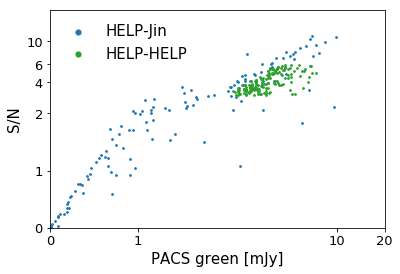

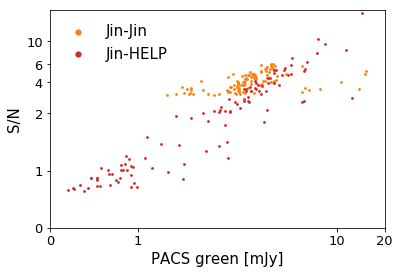

In [120]:
plt.figure()
plt.scatter(test_sample_1['pacs_green'], test_sample_1['pacs_green']/test_sample_1['pacs_green_err'], label = 'HELP-Jin', s = 3, c = 'C0')
plt.scatter(test_sample_2['pacs_green'], test_sample_2['pacs_green']/test_sample_2['pacs_green_err'], label = 'HELP-HELP', s = 3, c = 'C2')
plt.xlim(0,20)
plt.ylim(0,20)
plt.xscale('symlog')
plt.yscale('symlog')
plt.xticks([0, 1, 10, 20], [0, 1, 10, 20])
plt.yticks([0, 1, 2, 4, 6, 10], [0, 1, 2, 4, 6, 10])
plt.ylabel('S/N', fontsize = 15)
plt.xlabel('PACS green [mJy]', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 13)
plt.legend(frameon = False, prop = {'size': 15}, markerscale = 3 , loc = 'upper left');

plt.figure()
plt.scatter(test_sample_3['pacs_green'], test_sample_3['pacs_green']/test_sample_3['pacs_green_err'], label = 'Jin-Jin', s = 3, c = 'C1')
plt.scatter(test_sample_4['pacs_green'], test_sample_4['pacs_green']/test_sample_4['pacs_green_err'], label = 'Jin-HELP', s = 3, c = 'C3')
plt.xlim(0,20)
plt.ylim(0,20)
plt.xscale('symlog')
plt.yscale('symlog')
plt.xticks([0, 1, 10, 20], [0, 1, 10, 20])
plt.yticks([0, 1, 2, 4, 6, 10], [0, 1, 2, 4, 6, 10])
plt.ylabel('S/N', fontsize = 15)
plt.xlabel('PACS green [mJy]', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 13)
plt.legend(frameon = False, prop = {'size': 15}, markerscale = 3 , loc = 'upper left');

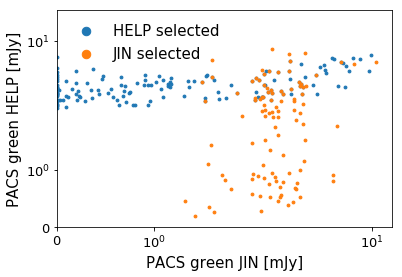

In [124]:
plt.figure()
plt.scatter(test_sample_1['pacs_green'], test_sample_2['pacs_green'], s = 8, c = 'C0', label = 'HELP selected')
plt.scatter(test_sample_3['pacs_green'], test_sample_4['pacs_green'], s = 8, c = 'C1', label = 'JIN selected')
plt.xlim(0,13)
plt.ylim(0,20)
plt.xscale('symlog')
plt.yscale('symlog')
plt.ylabel('PACS green HELP [mJy]', fontsize = 15)
plt.xlabel('PACS green JIN [mJy]', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 13)
plt.legend(frameon = False, prop = {'size': 15}, markerscale = 3 , loc = 'upper left');

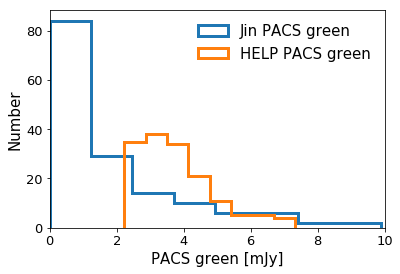

In [117]:
plt.figure()
plt.hist(test_sample_1['pacs_green'], bins = 'scott', histtype = 'step', lw = 3, label = 'Jin PACS green')
plt.hist(test_sample_2['pacs_green'], bins = 'scott', histtype = 'step', lw = 3, label = 'HELP PACS green')
plt.xlim(0, 10)
plt.ylabel('Number', fontsize = 15)
plt.xlabel('PACS green [mJy]', fontsize = 15)
plt.tick_params(axis = 'both', which = 'major', labelsize = 13)
plt.legend(frameon = False, prop = {'size': 15}, markerscale = 3 , loc = 'upper right');

Final file length: 35
Band: 			 Data in Vero: 		Non_Zero:	My data:	Non_zero:
         galex.NUV_x		35		24		35		22
    cfht.megacam.u_x		35		35		35		31
  subaru.suprime.B_x		35		35		35		31
  subaru.suprime.V_x		35		35		35		31
  subaru.suprime.r_x		35		35		35		31
  subaru.suprime.i_x		35		35		35		31
  subaru.suprime.z_x		35		35		35		31
      subaru.hsc.y_x		35		35		35		31
        UKIRT_WFCJ_x		35		35		35		31
     cfht.wircam.H_x		35		34		35		31
           WFCAM_K_x		35		35		35		31
             IRAC1_x		35		35		35		31
             IRAC2_x		35		35		35		31
             IRAC3_x		35		35		35		31
             IRAC4_x		35		35		35		31
   spitzer.mips.24_x		35		35		35		31


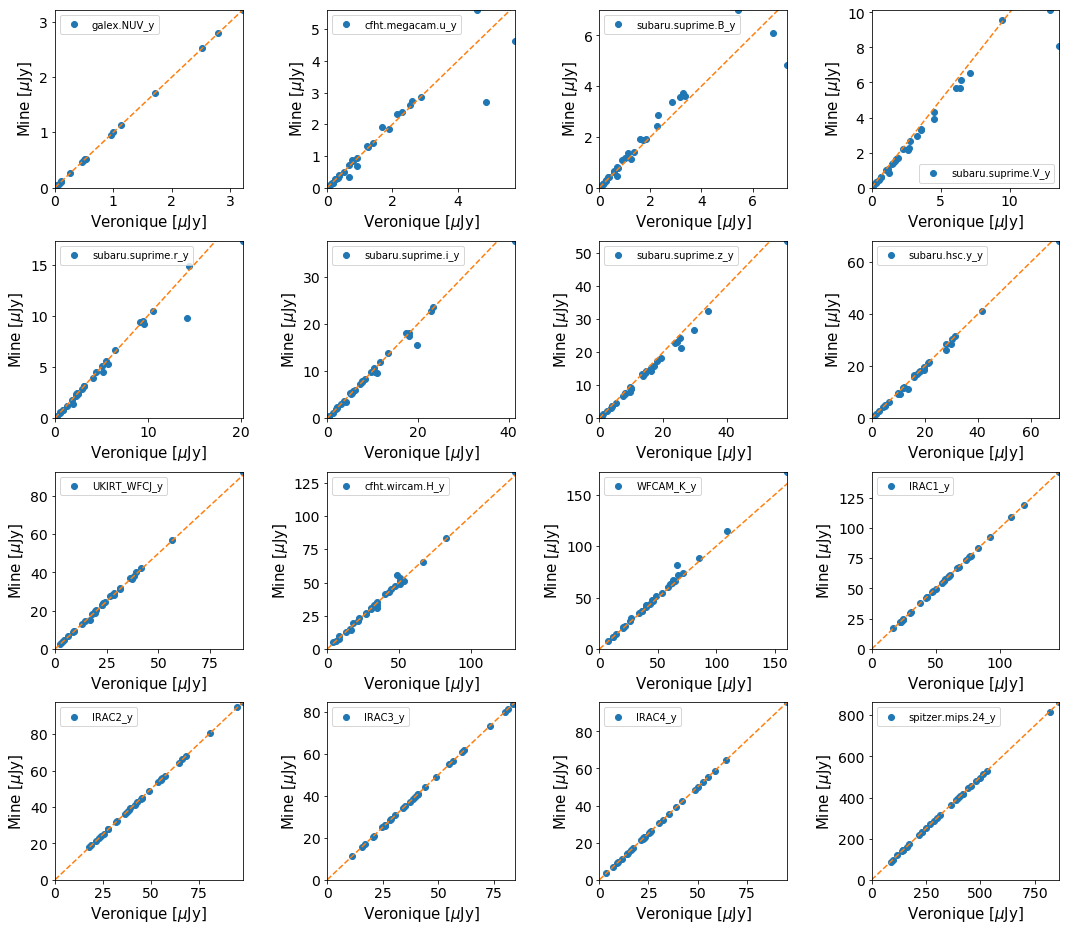

In [166]:
# # To check if the units are correct

# RRR = Table.read('/home/jvilla/Documents/PhD_2018/3DHST_Data/'
#           'COSMOS/Jin_Daddi_COSMOS/CIGALE_Jin.fits', format='fits')

# Veronique_sample = Table.read('/home/jvilla/Documents/PhD_2018/Veronique_Test/'
#                               'catalogue_RF_EW.fits', format = 'fits')

# #Merging Veronique's sample with my sample

# #Tables must be converted to pandas frame
# RRR   = RRR.to_pandas()
# Veronique_sample  = Veronique_sample.to_pandas()

# # Final table must have the same dimension as the first table plus the aditional columns from the second table
# test = pd.merge(Veronique_sample, RRR, how ='left', on='id')

# test = test.fillna(-9999.99)

# # Back to Astropy Table to use regular conditionals in python
# test = Table.from_pandas(test)

# print('Final file length: %i'%len(test))

# # Checking the bands inside both catalogs
# # Checking the number of valid data inside each band
# # Checking the mag and mag_err distributions

# X = np.linspace(0, 1000, 100)

# band_vero    = ['galex.NUV_x', 'cfht.megacam.u_x', 'subaru.suprime.B_x',\
#                 'subaru.suprime.V_x', 'subaru.suprime.r_x', 'subaru.suprime.i_x',\
#                 'subaru.suprime.z_x', 'subaru.hsc.y_x', 'UKIRT_WFCJ_x', 'cfht.wircam.H_x',\
#                 'WFCAM_K_x', 'IRAC1_x', 'IRAC2_x', 'IRAC3_x',\
#                 'IRAC4_x', 'spitzer.mips.24_x']

# band_mine    = ['galex.NUV_y', 'cfht.megacam.u_y', 'subaru.suprime.B_y',\
#                 'subaru.suprime.V_y', 'subaru.suprime.r_y', 'subaru.suprime.i_y',\
#                 'subaru.suprime.z_y', 'subaru.hsc.y_y', 'UKIRT_WFCJ_y', 'cfht.wircam.H_y',\
#                 'WFCAM_K_y', 'IRAC1_y', 'IRAC2_y', 'IRAC3_y',\
#                 'IRAC4_y', 'spitzer.mips.24_y']

# band_err_vero = ['galex.NUV_err_x', 'cfht.megacam.u_err_x', 'subaru.suprime.B_err_x',\
#                  'subaru.suprime.V_err_x', 'subaru.suprime.r_err_x', 'subaru.suprime.i_err_x',\
#                  'subaru.suprime.z_err_x', 'subaru.hsc.y_err_x', 'UKIRT_WFCJ_err_x', 'cfht.wircam.H_err_x',\
#                  'WFCAM_K_err_x', 'IRAC1_err_x', 'IRAC2_err_x', 'IRAC3_err_x',\
#                  'IRAC4_err_x', 'spitzer.mips.24_err_x']

# band_err_mine = ['galex.NUV_err_y', 'cfht.megacam.u_err_y', 'subaru.suprime.B_err_y',\
#                  'subaru.suprime.V_err_y', 'subaru.suprime.r_err_y', 'subaru.suprime.i_err_y',\
#                  'subaru.suprime.z_err_y', 'subaru.hsc.y_err_y', 'UKIRT_WFCJ_err_y', 'cfht.wircam.H_err_y',\
#                  'WFCAM_K_err_y', 'IRAC1_err_y', 'IRAC2_err_y', 'IRAC3_err_y',\
#                  'IRAC4_err_y', 'spitzer.mips.24_err_y']

# print('Band: \t\t\t Data in Vero: \t\tNon_Zero:\tMy data:\tNon_zero:')
# for i in range(len(band_vero)):
    
#     x = test[band_vero[i]][test[band_vero[i]] != -9999.99]
#     y = test[band_mine[i]][test[band_mine[i]] != -9999.99]
    
#     print('%20s\t\t%i\t\t%i\t\t%i\t\t%i'\
#           %(band_vero[i], len(test[band_vero[i]]), len(x), len(test[band_mine[i]]), len(y)))

# fig, axs = plt.subplots(4,4, figsize=(18, 16), facecolor='w', edgecolor='k')
# fig.subplots_adjust(hspace = 0.3, wspace = 0.45)

# axs = axs.ravel()

# for i in range(len(band_vero)):

#     axs[i].scatter(test[band_vero[i]]*1e3, test[band_mine[i]]*1e3)
#     axs[i].set_xlabel(r'Veronique [$\mu$Jy]', fontsize = 15)
#     axs[i].set_ylabel(r'Mine [$\mu$Jy]', fontsize = 15)
#     axs[i].plot(X, X, ls ='--', c = 'C1')
#     axs[i].set_xlim(0, np.max(test[band_vero[i]]*1e3))
#     axs[i].set_ylim(0, np.max(test[band_mine[i]]*1e3))
#     axs[i].tick_params(axis = 'both', which = 'major', labelsize = 14)
#     axs[i].legend(frameon = False, prop = {'size': 15}, markerscale = 3 , loc = 'upper left')
#     axs[i].legend()

# Unified catalog to have same objects and compared SEDs

In [399]:
jin_cigalon = Table.read('/home/jvilla/Documents/PhD_2018/3DHST_Data/'
          'COSMOS/Jin_Daddi_COSMOS/CIGALE_Jin_cigalon.fits', format='fits')

HELP_cigalon = Table.read('/home/jvilla/Documents/PhD_2018/3DHST_Data/'
          'COSMOS/Jin_Daddi_COSMOS/CIGALE_HELP_cigalon.fits', format='fits')

jin_HELP_cigalon = Table.read('/home/jvilla/Documents/PhD_2018/3DHST_Data/'
          'COSMOS/Jin_Daddi_COSMOS/CIGALE_Jin_HELP_cigalon.fits', format='fits')

In [400]:
print(len(jin_cigalon));print(len(HELP_cigalon));print(len(jin_HELP_cigalon))

223
278
108


In [401]:
jin_cigalon      = jin_cigalon.to_pandas()
HELP_cigalon     = HELP_cigalon.to_pandas()
jin_HELP_cigalon = jin_HELP_cigalon.to_pandas() 

In [402]:
all_sample = pd.merge(jin_HELP_cigalon, jin_cigalon, how ='left', on='id')

In [405]:
all_sample = pd.merge(all_sample, HELP_cigalon, how ='left', on='id')

In [406]:
all_sample = Table.from_pandas(all_sample)

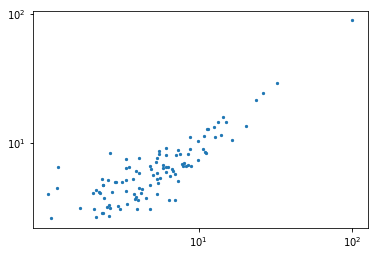

In [407]:
plt.scatter(all_sample['pacs_green_y'], all_sample['pacs_green'], s = 5)
plt.xscale('symlog')
plt.yscale('symlog')
# plt.xlim(1, 50)
# plt.ylim(1, 50)

In [408]:
# For CIGALE cigalon version

Jin_cigalon = Table([all_sample['id'], all_sample['redshift_y'], all_sample['galex_nuv_y'],\
                        all_sample['galex_nuv_err_y'], all_sample['megacam_u_y'], all_sample['megacam_u_err_y'],\
                        all_sample['suprime_b_y'], all_sample['suprime_b_err_y'], all_sample['suprime_v_y'],\
                        all_sample['suprime_v_err_y'], all_sample['suprime_r_y'], all_sample['suprime_r_err_y'],\
                        all_sample['suprime_i_y'], all_sample['suprime_i_err_y'], all_sample['suprime_z_y'],\
                        all_sample['suprime_z_err_y'], all_sample['suprime_y_y'], all_sample['suprime_y_err_y'],\
                        all_sample['vista_j_y'], all_sample['vista_j_err_y'], all_sample['vista_h_y'],\
                        all_sample['vista_h_err_y'], all_sample['vista_ks_y'], all_sample['vista_ks_err_y'],\
                        all_sample['IRAC_CH1_y'], all_sample['IRAC_CH1_err_y'], all_sample['IRAC_CH2_y'],\
                        all_sample['IRAC_CH2_err_y'], all_sample['IRAC_CH3_y'], all_sample['IRAC_CH3_err_y'],\
                        all_sample['IRAC_CH4_y'], all_sample['IRAC_CH4_err_y'],\
                        all_sample['mips_24_y'], all_sample['mips_24_err_y'],\
                        all_sample['pacs_green_y'], all_sample['pacs_green_err_y'],\
                        all_sample['pacs_red_y'], all_sample['pacs_red_err_y'],\
                        all_sample['spire_250_y'], all_sample['spire_250_err_y'],\
                        all_sample['spire_350_y'], all_sample['spire_350_err_y'],\
                        all_sample['spire_500_y'], all_sample['spire_500_err_y']],\
               names = ('id', 'redshift', 'galex_nuv', 'galex_nuv_err', 'megacam_u', 'megacam_u_err',\
                        'suprime_b', 'suprime_b_err', 'suprime_v', 'suprime_v_err',\
                        'suprime_r', 'suprime_r_err', 'suprime_i', 'suprime_i_err',\
                        'suprime_z', 'suprime_z_err', 'suprime_y', 'suprime_y_err',\
                        'vista_j', 'vista_j_err', 'vista_h', 'vista_h_err',\
                        'vista_ks', 'vista_ks_err', 'IRAC_CH1', 'IRAC_CH1_err',\
                        'IRAC_CH2', 'IRAC_CH2_err', 'IRAC_CH3', 'IRAC_CH3_err',\
                        'IRAC_CH4', 'IRAC_CH4_err', 'mips_24', 'mips_24_err',\
                        'pacs_green', 'pacs_green_err',\
                        'pacs_red', 'pacs_red_err',\
                        'spire_250', 'spire_250_err', 'spire_350',\
                        'spire_350_err', 'spire_500', 'spire_500_err'))

os.system('rm -rf /home/jvilla/Documents/PhD_2018/3DHST_Data/'
          'COSMOS/Jin_Daddi_COSMOS/CIGALE_Jin_cigalon_1.fits')
Jin_cigalon .write('/home/jvilla/Documents/PhD_2018/3DHST_Data/'
          'COSMOS/Jin_Daddi_COSMOS/CIGALE_Jin_cigalon_1.fits', format='fits')

# For CIGALE cigalon version

HELP_cigalon = Table([all_sample['id'], all_sample['redshift'], all_sample['galex_nuv'],\
                        all_sample['galex_nuv_err'], all_sample['megacam_u'], all_sample['megacam_u_err'],\
                        all_sample['suprime_b'], all_sample['suprime_b_err'], all_sample['suprime_v'],\
                        all_sample['suprime_v_err'], all_sample['suprime_r'], all_sample['suprime_r_err'],\
                        all_sample['suprime_i'], all_sample['suprime_i_err'], all_sample['suprime_z'],\
                        all_sample['suprime_z_err'], all_sample['suprime_y'], all_sample['suprime_y_err'],\
                        all_sample['vista_j'], all_sample['vista_j_err'], all_sample['vista_h'],\
                        all_sample['vista_h_err'], all_sample['vista_ks'], all_sample['vista_ks_err'],\
                        all_sample['IRAC_CH1'], all_sample['IRAC_CH1_err'], all_sample['IRAC_CH2'],\
                        all_sample['IRAC_CH2_err'], all_sample['IRAC_CH3'], all_sample['IRAC_CH3_err'],\
                        all_sample['IRAC_CH4'], all_sample['IRAC_CH4_err'],\
                        all_sample['mips_24'], all_sample['mips_24_err'],\
                        all_sample['pacs_green'], all_sample['pacs_green_err'],\
                        all_sample['pacs_red'], all_sample['pacs_red_err'],\
                        all_sample['spire_250'], all_sample['spire_250_err'],\
                        all_sample['spire_350'], all_sample['spire_350_err'],\
                        all_sample['spire_500'], all_sample['spire_500_err']],\
               names = ('id', 'redshift', 'galex_nuv', 'galex_nuv_err', 'megacam_u', 'megacam_u_err',\
                        'suprime_b', 'suprime_b_err', 'suprime_v', 'suprime_v_err',\
                        'suprime_r', 'suprime_r_err', 'suprime_i', 'suprime_i_err',\
                        'suprime_z', 'suprime_z_err', 'suprime_y', 'suprime_y_err',\
                        'vista_j', 'vista_j_err', 'vista_h', 'vista_h_err',\
                        'vista_ks', 'vista_ks_err', 'IRAC_CH1', 'IRAC_CH1_err',\
                        'IRAC_CH2', 'IRAC_CH2_err', 'IRAC_CH3', 'IRAC_CH3_err',\
                        'IRAC_CH4', 'IRAC_CH4_err', 'mips_24', 'mips_24_err',\
                        'pacs_green', 'pacs_green_err',\
                        'pacs_red', 'pacs_red_err',\
                        'spire_250', 'spire_250_err', 'spire_350',\
                        'spire_350_err', 'spire_500', 'spire_500_err'))

os.system('rm -rf /home/jvilla/Documents/PhD_2018/3DHST_Data/'
          'COSMOS/Jin_Daddi_COSMOS/CIGALE_HELP_cigalon_1.fits')
HELP_cigalon.write('/home/jvilla/Documents/PhD_2018/3DHST_Data/'
          'COSMOS/Jin_Daddi_COSMOS/CIGALE_HELP_cigalon_1.fits', format='fits')

# 3DHST Zspec and Zphot check when Emission Lines are detected

In [409]:
final_sample       = Table.read('/home/jvilla/Documents/PhD_2018/3DHST_Data/COSMOS/'
                          'CIGALE_file/final_sample.fits', format = 'fits')

In [410]:
final_sample = final_sample.to_pandas()
final_sample = final_sample.fillna(-9999.99)
final_sample = Table.from_pandas(final_sample)

In [411]:
final_sample_zspec = final_sample[final_sample['use_zgrism'] == 1]

final_sample_zphot = final_sample[final_sample['use_zgrism'] <= 0]

In [412]:
print('Objects with zspec = %i \t Objects with zphot: %i'%(len(final_sample_zspec),len(final_sample_zphot)))

Objects with zspec = 2096 	 Objects with zphot: 1580


In [369]:
lines     = ['Ha_FLUX', 'Hb_FLUX', 'OII_FLUX', 'OIII_FLUX']
lines_err = ['Ha_FLUX_ERR', 'Hb_FLUX_ERR', 'OII_FLUX_ERR', 'OIII_FLUX_ERR']
line_name = ['Ha', 'Hb', 'OII', 'OIII']

print('Line \t\t Flux > 0 \t Zspec \t Zphot \t Zspec,SNR > 3 \t Zphot,SNR >3')
print('----------------------------------------------------------------------------------')

for i in range(len(lines)):
    
    original_sample = final_sample[final_sample[lines[i]] > 0]
    original_snr    = final_sample[(final_sample[lines[i]] > 0) & (final_sample[lines_err[i]] > 0)]
    zspec_sample    = final_sample_zspec[final_sample_zspec[lines[i]] > 0]
    zphot_sample    = final_sample_zphot[final_sample_zphot[lines[i]] > 0]
    zspec_snr       = original_snr[(original_snr['use_zgrism'] == 1) &\
                                         (original_snr[lines[i]]/original_snr[lines_err[i]] > 3)]
    zphot_snr       = original_snr[(original_snr['use_zgrism'] <= 0) &\
                                         (original_snr[lines[i]]/original_snr[lines_err[i]] > 3)]
    
    print('%s \t%i \t\t%i \t%i \t%i \t\t%i'%(line_name[i], len(original_sample), len(zspec_sample), len(zphot_sample), len(zspec_snr), len(zphot_snr)))


Line 		 Flux > 0 	 Zspec 	 Zphot 	 Zspec,SNR > 3 	 Zphot,SNR >3
----------------------------------------------------------------------------------
Ha 	2389 		1597 	792 	967 		220
Hb 	992 		585 	407 	93 		40
OII 	1050 		375 	675 	117 		114
OIII 	1077 		625 	452 	260 		175


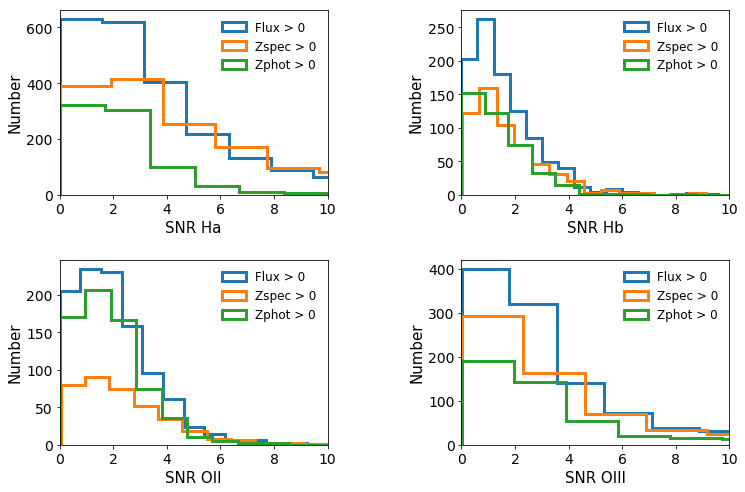

In [375]:
# Histograms

fig, axs = plt.subplots(2,2, figsize=(12, 8), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.35, wspace = 0.5)

axs = axs.ravel()

for i in range(len(line_name)):
    
    line       = final_sample[final_sample[lines[i]] > 0]
    line_zspec = final_sample_zspec[final_sample_zspec[lines[i]] > 0]
    line_zphot = final_sample_zphot[final_sample_zphot[lines[i]] > 0]
    
    axs[i].hist(line[lines[i]]/line[lines_err[i]], bins = 'scott', histtype = 'step', lw = 3,\
               label = 'Flux > 0')
    axs[i].hist(line_zspec[lines[i]]/line_zspec[lines_err[i]], bins = 'scott', histtype = 'step', lw = 3,\
               label = 'Zspec > 0')
    axs[i].hist(line_zphot[lines[i]]/line_zphot[lines_err[i]], bins = 'scott', histtype = 'step', lw = 3,\
               label = 'Zphot > 0')
    axs[i].set_ylabel('Number', fontsize = 15)
    axs[i].set_xlabel('SNR %s'%line_name[i], fontsize = 15)
    axs[i].set_xlim(0, 10)
    axs[i].tick_params(axis = 'both', which = 'major', labelsize = 14)
    axs[i].legend(frameon = False, prop = {'size': 12}, markerscale = 1 , loc = 'upper right')